In [1]:
%matplotlib inline
from Agents.dqn_agent import DQN_Agent
from Agents.ppo_agent import PPO_Agent
from Models import fc, rnn
import utils
import gymnasium as gym
import plotly.express as px
import numpy as np
device = utils.init_torch() #default goes to cuda -> cpu' or enter manualy



pygame 2.5.0 (SDL 2.28.0, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Train LunaLander
lets train LunaLander-discrete using PPO

In [3]:
env_name = "LunarLander-v2"
env = gym.make(env_name, render_mode="rgb_array")
model_class = fc.FC
model_kwargs = {'embed_dim': 64, 'repeat':2}
agent = PPO_Agent(obs_space=env.observation_space, action_space=env.action_space, device=device, batch_size=1024, max_mem_size=10**5, num_parallel_envs=4, lr=3e-4, entropy_coeff=0.05, model_class=model_class, model_kwargs=model_kwargs, discount_factor=0.99)
train_stats = agent.train_n_steps(env=env,n_steps=250000)
_ = agent.save_agent("lunar_ppo.pt")

### Plot rewards collected

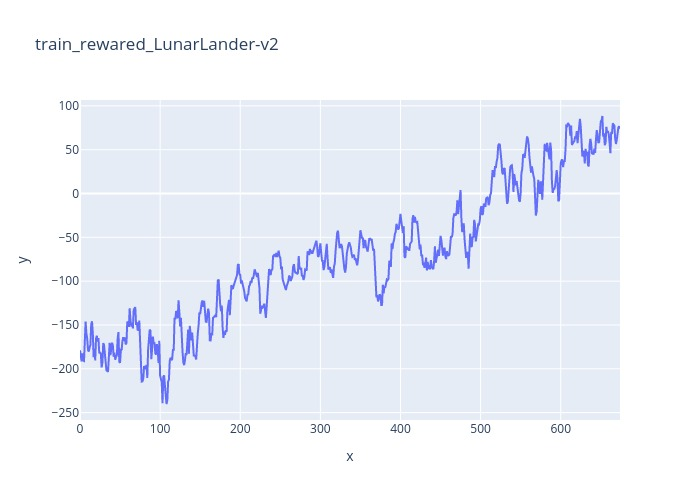

In [ ]:
utils.plot_res(train_stats, 'train_rewared_'+env_name, smooth_kernel=10, render_as='jpg') #supports notebook, browser as well

### Lets see our agent in action

In [4]:
agent.load_agent("lunar_ppo.pt")
env2 = gym.make("LunarLander-v2", render_mode="human")
mean_reward = agent.run_env(env2, render=True, best_act=True, num_runs=1)
print("Run Reward:", mean_reward)


Run Reward: [208.03659476]


# Train CartPole
Lets use DQN this time

In [5]:
env_name = "CartPole-v1"
env_c = gym.make(env_name, render_mode="rgb_array")
model_class_c = fc.FC
model_kwargs_c = {'embed_dim': 64, 'repeat':2}
agent_c = DQN_Agent(obs_space=env_c.observation_space, action_space=env_c.action_space, batch_size=32, max_mem_size=10**5,num_parallel_envs=16, lr=3e-4, model_class=model_class_c, model_kwargs=model_kwargs_c, discount_factor=0.99)
train_stats_c = agent_c.train_n_steps(env=env_c,n_steps=50000)


  0%|          | 0/50000 [00:00<?, ?it/s]

### Plot rewards collected

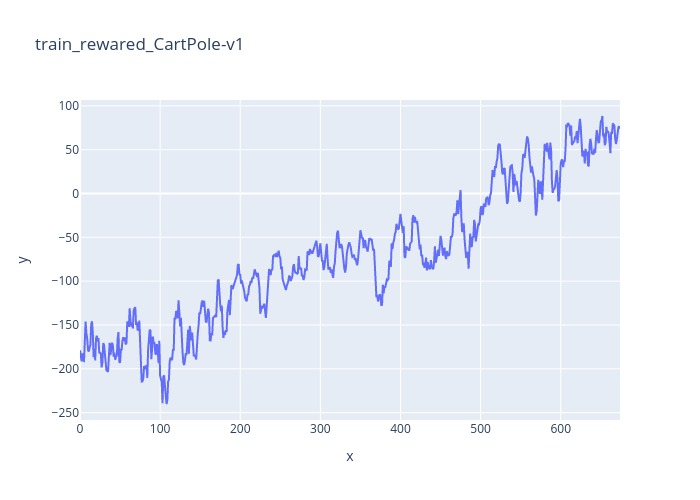

In [ ]:
utils.plot_res(train_stats, 'train_rewared_'+env_name, smooth_kernel=10, render_as='jpg')

### Check Our Agent

In [ ]:
env_c2 = gym.make(env_name, render_mode="human")
reward = agent_c.run_env(env_c2, render=True, best_act=True)
print("Run Reward:", reward)

Run Reward: [500.]


# Lets check a reccurent policy using simple gru

In [6]:
env_name = "CartPole-v1"
env = gym.make(env_name, render_mode="rgb_array")
model_class = rnn.GRU            
model_kwargs = {'hidden_dim': 64, 'num_grus':2}
agent = PPO_Agent(obs_space=env.observation_space, action_space=env.action_space, device=device, batch_size=1024, max_mem_size=10**6, num_parallel_envs=32, lr=3e-4, entropy_coeff=0.05, model_class=model_class, model_kwargs=model_kwargs, discount_factor=0.99)
train_stats = agent.train_n_steps(env=env,n_steps=200000)

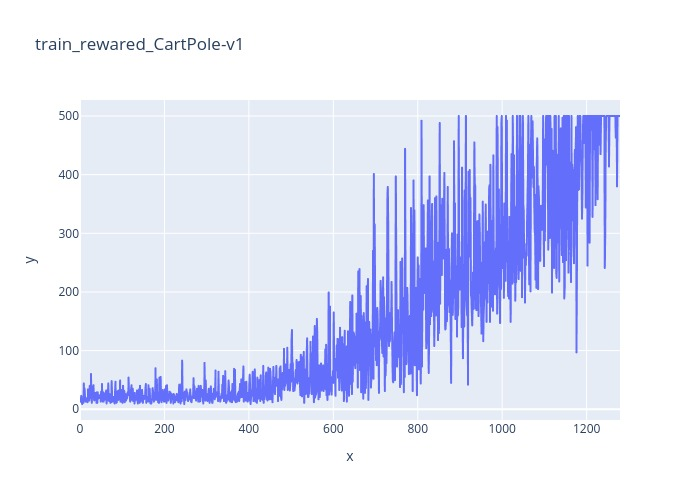

In [7]:
utils.plot_res(train_stats, 'train_rewared_'+env_name, smooth_kernel=1, render_as='jpg') #supports browser as well

In [ ]:
env_c2 = gym.make(env_name, render_mode="human")
reward = agent.run_env(env_c2, render=True, best_act=True, num_runs=1)
print("Run Reward:", reward)

Run Reward: [500.]
